# Машинное обучение, DS-поток
## Задание ML.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 60 баллов;
* Задача 3 &mdash; 120 баллов.

In [59]:
# Bot check

# HW_ID: ds_ml3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

*Если у вас новая версия `sklearn` и импорт `load_boston` в ячейке ниже выдает ошибку, скачайте этот датасет так, как написано в тексте ошибки, или же воспользуйтесь альтернативным более объемным датасетом `fetch_california_housing`.*

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, clone
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_wine
#from sklearn.datasets import load_boston  # см. комментарий выше
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
sns.set(font_scale=1.3, palette='Set2')
sns.set_style('darkgrid')

**При возникновении затруднений, которые не получается решить самостоятельно за разумное время, спрашивайте вопросы в чате. Вам обязательно постараются помочь. Успехов с решением!**

---
### Задача 1

Рассмотрим датасет для классификации вина на три класса по 13 вещественным признакам. Датасет состоит из 178 объектов. В данной задаче, используя этот датасет, вы научитесь пользоваться кросс-валидацией и подбирать оптимальные гиперпараметры модели.

In [3]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Загрузим сами данные

In [4]:
X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

**1.** Используя одну из стратегий кросс-валидации подберите оптимальные параметры обучения решающего дерева &mdash; `max_depth` (от 1 до 14) и `min_samples_split`, а также оптимальный критерий (достаточно рассмотреть критерий Джини и энтропийный). В качестве метрик используйте Accuracy и F1 с микро и макро усреднением. В данной задаче можно пользоваться готовой реализацией дерева.

Разобьем выборку на тестовую и контрольную части

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Зададим сетку для подбора параметров и сделаем кросс-валидацию с 5 фолдами (значение по умолчанию).

In [6]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}
param_grid = {
    'max_depth': np.arange(1, 15), 
    'min_samples_leaf': np.arange(1, 15),
    'criterion': ['gini', 'entropy']
}

tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit=False
)

tree_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             refit=False,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1_macro': make_scorer(f1_score, response_method='predict', average=macro),
                      'f1_micro': make_scorer(f1_score, response_method='predict', average=micro)})

Оптимальные параметры:

In [7]:
results = tree_gridsearch.cv_results_

metrics = ['accuracy', 'f1_macro', 'f1_micro']
for metric in metrics:
    prefix = 'mean_test_'
    best_index = np.argmax(results[prefix + metric])
    best_params = results['params'][best_index]
    best_result = results[prefix + metric][best_index]
    
    print(f"Метрика: {metric}")
    print(f"Лучшие параметры: {best_params}")
    print(f"Лучший результат по метрике: {best_result:.4f}")
    print("-" * 40)

Метрика: accuracy
Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}
Лучший результат по метрике: 0.9547
----------------------------------------
Метрика: f1_macro
Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}
Лучший результат по метрике: 0.9552
----------------------------------------
Метрика: f1_micro
Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}
Лучший результат по метрике: 0.9547
----------------------------------------


Откуда лучшие параметры по любой метрике:

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}

Постройте графики зависимости метрик от максимальной глубины дерева для каждого критерия на train и на test. Значение min_samples_split фиксируйте.

Зафиксируем min_samples_split=6 как оптимальное значение. На основе функции с семинара построим функции для графиков:

In [8]:
def get_train_and_test_scores(param_name, grid, fixed_params=None, 
                              model=DecisionTreeClassifier):
    '''
    Функция для оценки метрик классификации 
    для заданных значений параметра param_name
    и фиксированных параметрах fixed_params.
    
    Возвращает словарь с метриками: accuracy, F1-micro, F1-macro.
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    3) fixed_params - зафиксированные параметры (по умолчанию None).
    4) model - обучаемая модель
    '''
    
    if fixed_params is None:
        fixed_params = {}
        
    # Метрики оценивания (название + функция)
    # lambda-функция нужна для изменения параметра average
    metrics = {
        'accuracy': accuracy_score,
        'f1_micro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='micro'),
        'f1_macro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro')
    }
    
    train_scores = {metric: [] for metric in metrics}
    test_scores = {metric: [] for metric in metrics}
    
    for param_value in grid:
        params = {**fixed_params, param_name: param_value}
        estimator = model(**params)
        estimator.fit(X_train, y_train)
        
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        
        for metric_name, metric_func in metrics.items():
            train_scores[metric_name].append(metric_func(y_train, y_train_pred))
            test_scores[metric_name].append(metric_func(y_test, y_test_pred))
    
    return {'train': train_scores, 'test': test_scores}


def plot_dependence(param_name, grid=range(2, 20), fixed_params=None,
                    model=DecisionTreeClassifier,
                    title=''):
    '''
    Функция для отображения графиков зависимости метрик классификации 
    от значения параметра c названием param_name и фиксированных параметрах fixed_params.
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    3) model - обучаемая модель, по умолчанию DecisionTreeClassifier
    4) title - заголовок графика.
    '''
    
    plt.figure(figsize=(14, 8))
    
    scores = get_train_and_test_scores(param_name, grid, fixed_params, model)
    
    # Цикл по метрикам для построения графиков
    for i, metric_name in enumerate(scores['train']):
        plt.subplot(2, 2, i + 1)
        plt.plot(grid, scores['train'][metric_name], label=f'Train {metric_name}', lw=3)
        plt.plot(grid, scores['test'][metric_name], label=f'Test {metric_name}', lw=3)
        plt.legend(fontsize=12)
        plt.xlabel(param_name, fontsize=12)
        plt.ylabel(metric_name.capitalize(), fontsize=12)
        plt.title(metric_name.capitalize(), fontsize=14)

    # Оформление
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Осталось построить графики

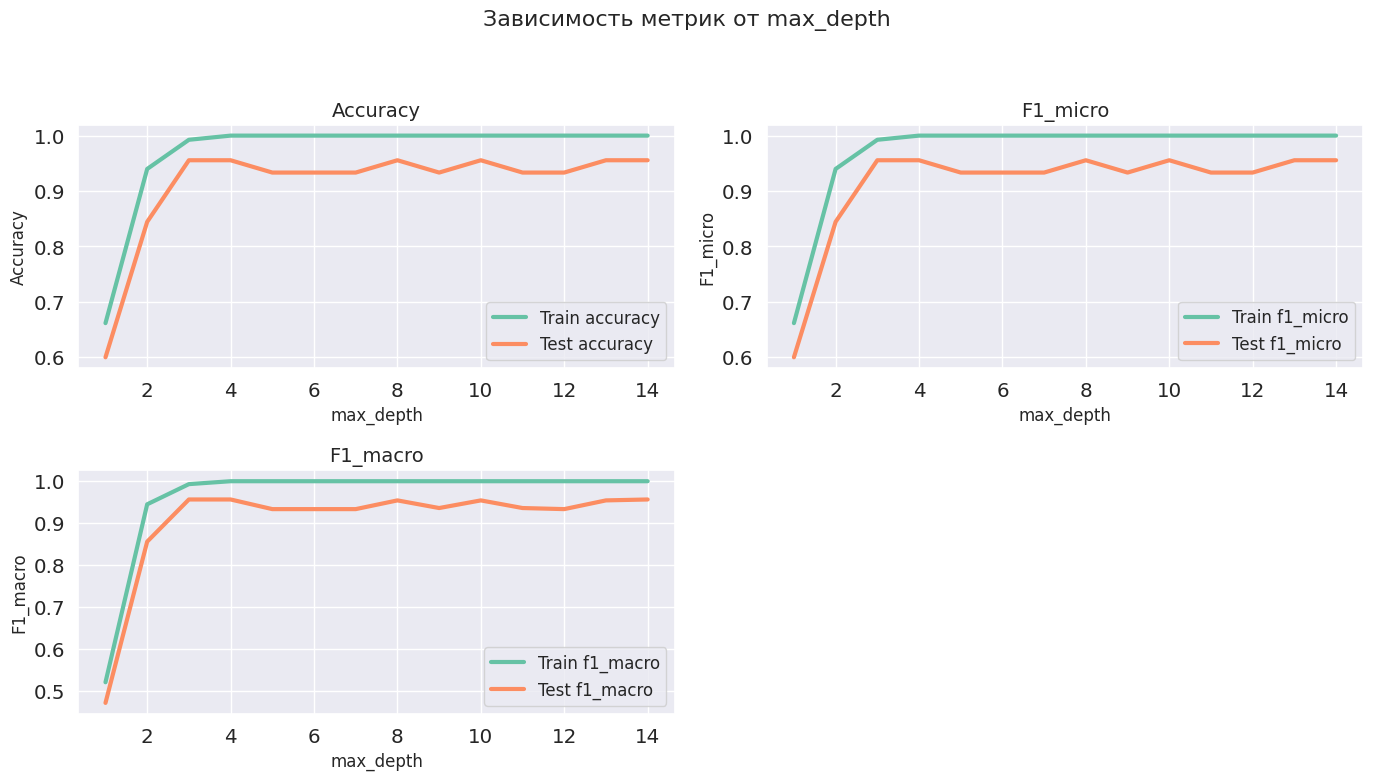

In [9]:
plot_dependence('max_depth', 
                grid=range(1, 15), 
                fixed_params={
                    'min_samples_split': 6,
                    'criterion': 'gini'
                }, 
                title='Зависимость метрик от max_depth')


Как видно, оптимальное значение глубины равно 3, далее происходит переобучение на тренировочной выборке (дерево слишком сильно ветвится)

**2.** Подберите коэффициент регуляризации для логистической регрессии и постройте аналогичные графики. Какая из двух моделей лучше?

In [10]:
param_grid = {
    'C': np.linspace(0.01, 10, 30),
    'max_iter': [100, 300, 800]
}

logistic_gridsearch = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring=scoring,
    refit=False
)

logistic_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 0.01      ,  0.35448276,  0.69896552,  1.04344828,  1.38793103,
        1.73241379,  2.07689655,  2.42137931,  2.76586207,  3.11034483,
        3.45482759,  3.79931034,  4.1437931 ,  4.48827586,  4.83275862,
        5.17724138,  5.52172414,  5.8662069 ,  6.21068966,  6.55517241,
        6.89965517,  7.24413793,  7.58862069,  7.93310345,  8.27758621,
        8.62206897,  8.96655172,  9.31103448,  9.65551724, 10.        ]),
                         'max_iter': [100, 300, 800]},
             refit=False,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1_macro': make_scorer(f1_score, response_method='predict', average=macro),
                      'f1_micro': make_scorer(f1_score, response_method='predict', average=micro)})

Посмотрим на оптимальные параметры

In [11]:
results = logistic_gridsearch.cv_results_

metrics = ['accuracy', 'f1_macro', 'f1_micro']
for metric in metrics:
    prefix = 'mean_test_'
    best_index = np.argmax(results[prefix + metric])
    best_params = results['params'][best_index]
    best_result = results[prefix + metric][best_index]
    
    print(f"Метрика: {metric}")
    print(f"Лучшие параметры: {best_params}")
    print(f"Лучший результат по метрике: {best_result:.4f}")
    print("-" * 40)

Метрика: accuracy
Лучшие параметры: {'C': 5.5217241379310344, 'max_iter': 100}
Лучший результат по метрике: 0.9325
----------------------------------------
Метрика: f1_macro
Лучшие параметры: {'C': 5.5217241379310344, 'max_iter': 100}
Лучший результат по метрике: 0.9344
----------------------------------------
Метрика: f1_micro
Лучшие параметры: {'C': 5.5217241379310344, 'max_iter': 100}
Лучший результат по метрике: 0.9325
----------------------------------------


Положим C=5 как оптимальное значение, а для обучения хватит max_iter=200

Осталось построить графики

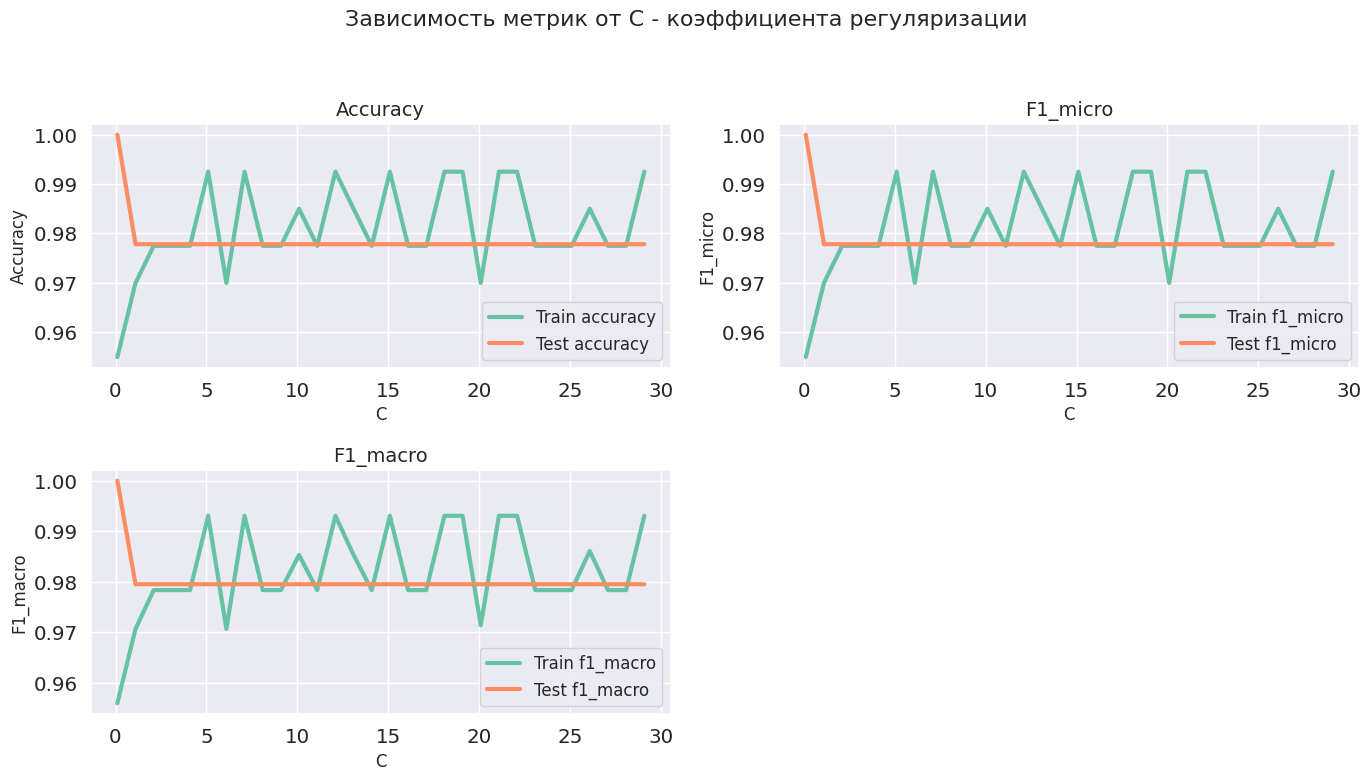

In [12]:
plot_dependence('C', 
                grid=np.arange(0.1, 30), 
                fixed_params={'max_iter': 200}, 
                title='Зависимость метрик от C - коэффициента регуляризации',
                model=LogisticRegression)


Посчитаем на тестовой выборке метрики оптимальных параметров моделей

In [13]:
optimal_tree_params = {
    'max_depth': 3, 
    'min_samples_split': 6,
    'criterion': 'gini'
}

tree_model = DecisionTreeClassifier(**optimal_tree_params)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_f1_micro = f1_score(y_test, y_tree_pred, average='micro')
tree_f1_macro = f1_score(y_test, y_tree_pred, average='macro')

optimal_logistic_params = {
    'C': 21,
    'max_iter': 200
}

logistic_model = LogisticRegression(**optimal_logistic_params)
logistic_model.fit(X_train, y_train)
y_logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
logistic_f1_micro = f1_score(y_test, y_logistic_pred, average='micro')
logistic_f1_macro = f1_score(y_test, y_logistic_pred, average='macro')

print("Метрики для решающего дерева:")
print(f"Accuracy: {tree_accuracy:.4f}")
print(f"F1 (micro): {tree_f1_micro:.4f}")
print(f"F1 (macro): {tree_f1_macro:.4f}")

print("\nМетрики для логистической регрессии:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"F1 (micro): {logistic_f1_micro:.4f}")
print(f"F1 (macro): {logistic_f1_macro:.4f}")

Метрики для решающего дерева:
Accuracy: 0.9333
F1 (micro): 0.9333
F1 (macro): 0.9361

Метрики для логистической регрессии:
Accuracy: 0.9778
F1 (micro): 0.9778
F1 (macro): 0.9795


Логистическая регрессия оказалось лучше, не смотря на то, что коэффициент регуляризации давал примерно одинаковый эффект на довольно широком отрезке значений параметра

**3.** Предположим, что мы не различаем классы 1 и 2. Объедините эти два класса и посмотрите на полученное соотношение классов.

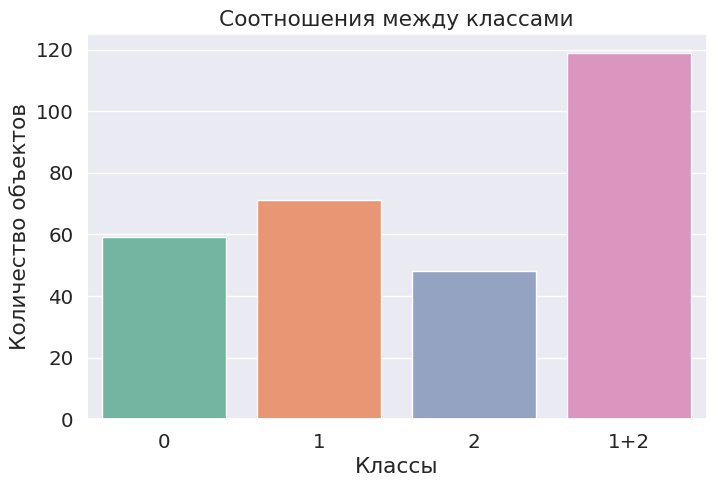

In [14]:
df = pd.DataFrame(y, columns=['class'])

counts = df.value_counts().sort_index()
counts['1+2'] = counts[1] + counts[2]

plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index.map(lambda x: str(x[0])),
            y=counts.values, palette='Set2')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.title('Соотношения между классами')
plt.show()

Сама замена

In [15]:
y[y == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Подберите параметры с помощью кросс-валидации для лучшего типа модели (логистическая регрессия, решающее дерево) из первой части задачи. В рамках кросс-валидации посчитайте также метрики Precision и Recall. Как изменились оптимальные параметры?

Построим сразу все для двух моделей. Импорт новых метрик

In [16]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix
)

Кросс-валидация для логистической регрессии

In [17]:
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.1, 10, 30),
    'max_iter': [100, 500]
}

logistic_gridsearch = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_logistic,
    scoring='f1_macro',
    cv=5
)

logistic_gridsearch.fit(X_train, y_train)

best_logistic_params = logistic_gridsearch.best_params_
print("Оптимальные параметры для логистической регрессии:", best_logistic_params)

Оптимальные параметры для логистической регрессии: {'C': 1.4655172413793105, 'max_iter': 500, 'penalty': 'l2'}


Результаты для луших параметров:

In [18]:
logistic_model = logistic_gridsearch.best_estimator_

y_test_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1_macro = f1_score(y_test, y_test_pred, average='macro')
f1_micro = f1_score(y_test, y_test_pred, average='micro')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Macro: 1.0000
F1 Micro: 1.0000
Precision: 1.0000
Recall: 1.0000


И для дерева:

In [19]:
param_grid_tree = {
    'max_depth': np.arange(1, 15),
    'min_samples_split': np.arange(2, 10),
    'criterion': ['gini', 'entropy']
}

tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid_tree,
    scoring='f1_macro',
    cv=5
)

tree_gridsearch.fit(X_train, y_train)

best_tree_params = tree_gridsearch.best_params_
print("Оптимальные параметры для решающего дерева:", best_tree_params)

Оптимальные параметры для решающего дерева: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}


Осталось вывести результаты лучший параметров после кросс-валидации

In [20]:
tree_model = tree_gridsearch.best_estimator_
y_tree_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1_macro = f1_score(y_test, y_tree_pred, average='macro')
f1_micro = f1_score(y_test, y_tree_pred, average='micro')
precision = precision_score(y_test, y_tree_pred)
recall = recall_score(y_test, y_tree_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Macro: 0.9055
F1 Micro: 0.9111
Precision: 1.0000
Recall: 0.8667


Постройти графики ROC и PR кривых для модели с подобранными гиперпараметрами. Какой вывод можно сделать?

Функция для построения кривых

In [21]:
def plot_roc_pr(y_true, y_scores, title):
    
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


Само построение кривых

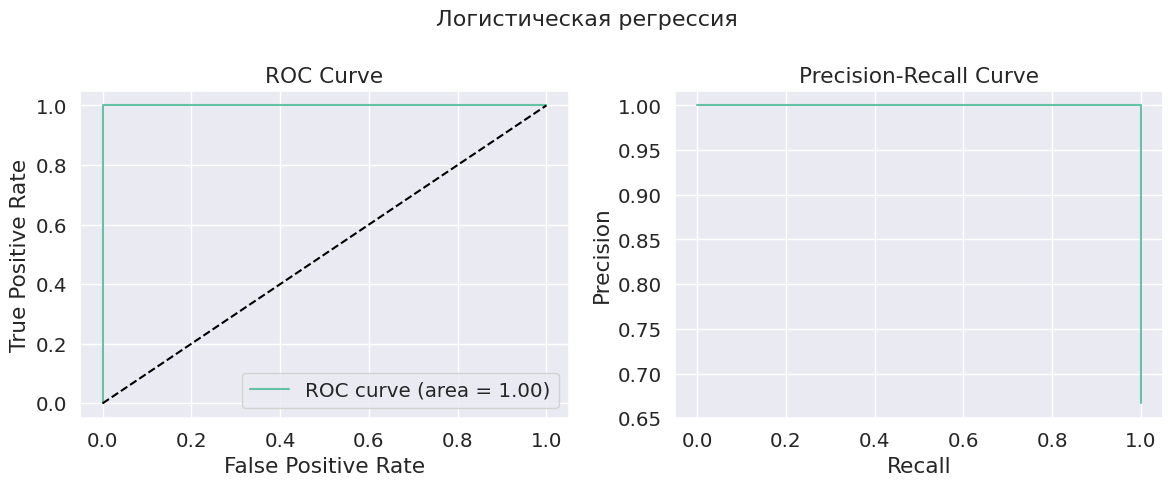

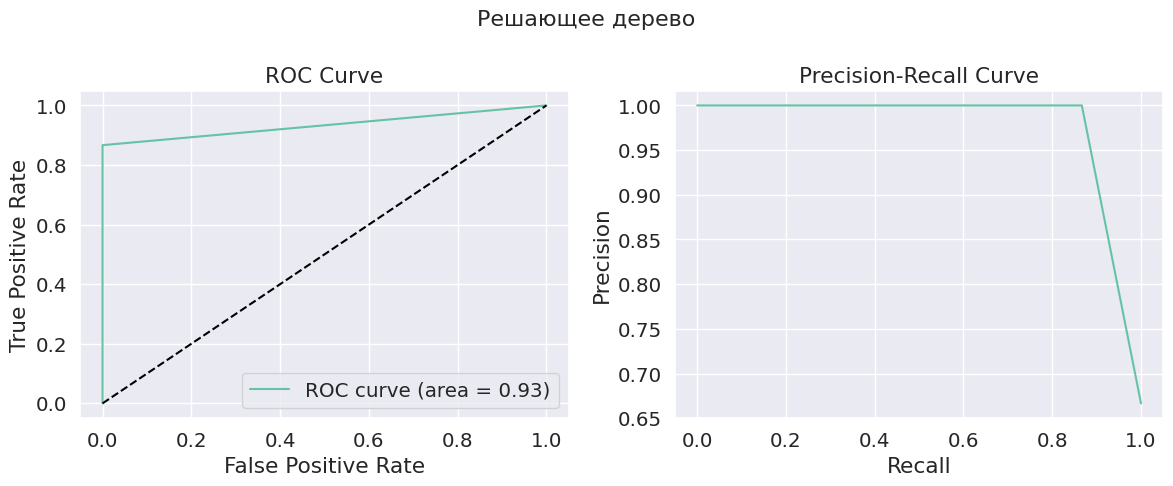

In [22]:
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]


plot_roc_pr(y_test, logistic_probs, 'Логистическая регрессия')
plot_roc_pr(y_test, tree_probs, 'Решающее дерево')

Выберите два порога, посчитайте для них метрики бинарной классификации и придумайте по одной ситутации, где один порог лучше другого.

In [23]:
thresholds = [0.2, 0.9]
for threshold in thresholds:
    y_pred_threshold = (logistic_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    print(f"\nПорог: {threshold}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")


Порог: 0.2
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Порог: 0.9
Precision: 1.0000
Recall: 0.8667
F1: 0.9286


Маленький порог нужен для ситуаций, где важно не пропустить положительный случай (например, диагностика болезни)

Высокий порог подходит для ситуаций, где важно минимизировать ложные срабатывания (например, отбор кандидатов на работу).

**Про сравнение логрегрессии и дерева**

В этом датасете, судя по всему, есть линейная разделимость между таргетами, поэтому логрегрессия сработала хорошо.

Дерево в свою очередь может работать и с нелинейными данными, а еще лучше себя покажет в случаях с категориальными признаками или наличиями пропусков в данных.

---
### Задача 2

Рассмотрим модель с наилучшими гиперпараметрами из предыдущей задачи для бинарной классификации. Исследуем свойства различных подходов валидации. В качестве метрики используйте F1-метрику.

Выполните не менее 100 следующих итераций.
1. Перемешайте исходные данные.
2. Выполните подход с однократным разбиением:
    * разделите перемешанные даннные на обучающую и валидационную выборку,
    * обучите модель на обучающей выборке,
    * посчитайте качество модели на валидационной выборке и сохраните это значение.
3. Выполните KFold-валидацию:
    * примените KFold к перемешанным даннным, выполняя разбиение на 5 фолдов,
    * посчитайте среднее и дисперсию качества моделей по фолдам и сохраните эти значение.
4. Аналогично примените ShuffleSplit-валидацию, выполнив 5 ее итераций. На каждой итерации размер валидационной части должен совпадать с тем, который был использован в KFold. Иначе говоря, нужно использовать `ShuffleSplit(n_splits=5, test_size=0.2)`.
5. Повторите пункты 2-4 для стратифицированных разбиений.

*Проверьте, что на разных итерациях у вас получаются разные значения метрик. Если одинаковые, то может быть где-то нужно отключить `random_state`. Также советуем при отладке кода делать запуски на малое количество итераций.*

Функция всех разбиений

In [24]:
def validate_model(model, X, y, n_iter=100):
    '''
    Функция для сравнения разных методов
    валидации модели model
    
    Параметры:
    1) model - модель,
    2) X - признаки,
    3) y - таргеты
    4) n_iter - число итераций валидаций.
    '''
    
    results = {
        'single_split': [],
        'kfold': [],
        'kfold_var': [],
        'shufflesplit': [],
        'shufflesplit_var': [],
        'strat_single': [],
        'strat_kfold': [],
        'strat_kfold_var': [],
        'strat_shufflesplit': [],
        'strat_shufflesplit_var': []
    }

    for _ in range(n_iter):
        indices = np.random.permutation(len(y))
        X, y = X[indices], y[indices]
        
        # Single Split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        model_clone = clone(model)
        model_clone.fit(X_train, y_train)
        y_pred = model_clone.predict(X_val)
        results['single_split'].append(f1_score(y_val, y_pred))

        # KFold
        kfold = KFold(n_splits=5)
        f1_scores = []
        for train_index, val_index in kfold.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model_clone = clone(model)
            model_clone.fit(X_train, y_train)
            y_pred = model_clone.predict(X_val)
            f1_scores.append(f1_score(y_val, y_pred))
        results['kfold'].append(np.mean(f1_scores))
        results['kfold_var'].append(np.var(f1_scores))

        # ShuffleSplit
        shufflesplit = ShuffleSplit(n_splits=5, test_size=0.2)
        f1_scores = []
        for train_index, val_index in shufflesplit.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model_clone = clone(model)
            model_clone.fit(X_train, y_train)
            y_pred = model_clone.predict(X_val)
            f1_scores.append(f1_score(y_val, y_pred))
        results['shufflesplit'].append(np.mean(f1_scores))
        results['shufflesplit_var'].append(np.var(f1_scores))

        # Stratified Single Split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
        model_clone = clone(model)
        model_clone.fit(X_train, y_train)
        y_pred = model_clone.predict(X_val)
        results['strat_single'].append(f1_score(y_val, y_pred))


        # Stratified KFold
        strat_kfold = StratifiedKFold(n_splits=5)
        f1_scores = []
        for train_index, val_index in strat_kfold.split(X, y):
            model_clone.fit(X[train_index], y[train_index])
            y_pred = model_clone.predict(X[val_index])
            f1_scores.append(f1_score(y[val_index], y_pred))
        results['strat_kfold'].append(np.mean(f1_scores))
        results['strat_kfold_var'].append(np.var(f1_scores))

        # Stratified ShuffleSplit
        stratified_shufflesplit = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
        f1_scores = []
        for train_index, val_index in stratified_shufflesplit.split(X, y):
            model_clone.fit(X[train_index], y[train_index])
            y_pred = model_clone.predict(X[val_index])
            f1_scores.append(f1_score(y[val_index], y_pred))
        results['strat_shufflesplit'].append(np.mean(f1_scores))
        results['strat_shufflesplit_var'].append(np.var(f1_scores))

    return results

Осталось запустить валидацию

In [25]:
results = validate_model(logistic_model, X_train, y_train, n_iter=100)

По всем итерациям посчитайте
* выборочную дисперсию среднего качества моделей для каждого из трех подходов, тем самым оценив разброс значений метрик в каждом подходе;
* постройте kde-график среднего качества моделей;
* для подходов KFold и ShuffleSplit посчитайте выборочное среднее дисперсии качества моделей по фолдам, тем самым оценив разброс метрик между фолдами/итерациями.

Выборочная дисперсия и выборочное среднее дисперсии:

In [26]:
variances_of_means = {
    'single_split': np.var(results['single_split']),
    'kfold': np.var(results['kfold']),
    'shufflesplit': np.var(results['shufflesplit']),
    'strat_single_split': np.var(results['strat_single']), 
    'strat_kfold': np.var(results['strat_kfold']),
    'strat_shufflesplit': np.var(results['strat_shufflesplit'])
}

means_of_variances = {
    'kfold': np.mean(results['kfold_var']),
    'shufflesplit': np.mean(results['shufflesplit_var']),
    'strat_kfold': np.mean(results['strat_kfold_var']),
    'strat_shufflesplit': np.mean(results['strat_shufflesplit_var'])
}

df_variances_of_means = pd.DataFrame(list(variances_of_means.items()),
                                     columns=['Метод', 'Дисперсия'])
print("Выборочная дисперсия среднего качества моделей:")
print(df_variances_of_means)

df_means_of_variances = pd.DataFrame(list(means_of_variances.items()),
                                     columns=['Метод', 'Средняя дисперсия'])
print("\nСредние значения дисперсий качества моделей:")
print(df_means_of_variances)

Выборочная дисперсия среднего качества моделей:
                Метод  Дисперсия
0        single_split   0.000577
1               kfold   0.000040
2        shufflesplit   0.000133
3  strat_single_split   0.000517
4         strat_kfold   0.000046
5  strat_shufflesplit   0.000159

Средние значения дисперсий качества моделей:
                Метод  Средняя дисперсия
0               kfold           0.000744
1        shufflesplit           0.000760
2         strat_kfold           0.000637
3  strat_shufflesplit           0.000588


И графики kde среднего качества:

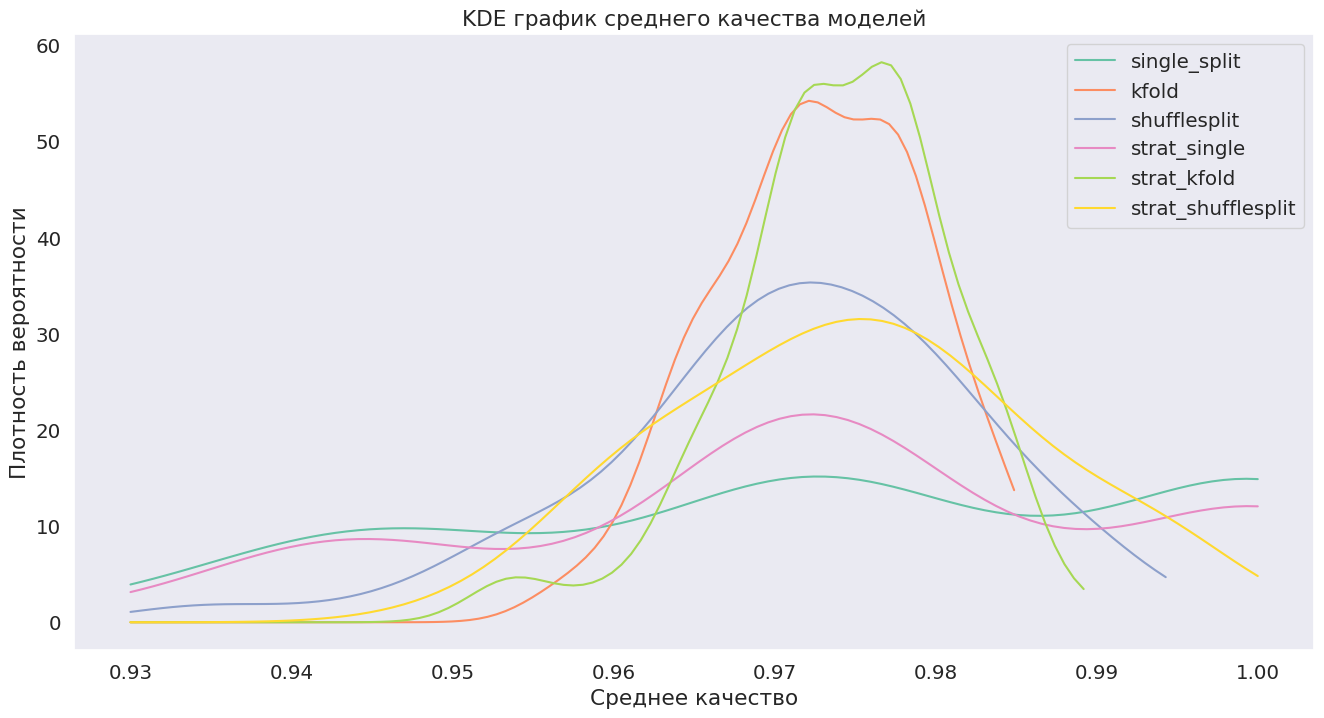

In [27]:
plt.figure(figsize=(16, 8))
for key in ['single_split', 'kfold', 'shufflesplit',
            'strat_single', 'strat_kfold', 'strat_shufflesplit']:
    density = gaussian_kde(results[key])
    x = np.linspace(0.93, max(results[key]), 100)
    plt.plot(x, density(x), label=f'{key}')
plt.title('KDE график среднего качества моделей')
plt.xlabel('Среднее качество')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

Сделайте выводы о свойствах подходов, их преимуществах и недостатках.

**Выводы**
1) Однократное разбиение - легко реализовать и посчитать. Однако качество может сильно зависить от вида разбиения, модель может быть переобучена на тренировочной выборке для валидационной (плохое разделение данных). Частично это исправляет стратифицированность, так дисперсия качества сильно уменьшилась, однако остается большей, чем в других моделях.

2) KFold - стабильно меньшая дисперсия и более надежное качество, за счет этого на графике плотности вероятности он дает самый высокий пик. Данные хорошо используются, потому что каждая точка попадет и валидационную, и в тестовую выборки. Минусы - долго считать.

3) ShuffleSplit - имеет большую дисперсию по сравнению с KFold в силу случайности. За счет той же случайности перебирает больше случайных разбиений выборки, меньше зависит от числа фолдов - в общем, более вариативный подход.

4) Стратифицикация - гаранитрует, что в выборках соотношение между классами будет поодерживаться одинаковым. Это особенно важно при дисбалансе классов, который у нас есть. За счет этого уменьшая дисперсия качества моделей.

---
### Задача 3

Каждый студент DS-потока должен написать свое дерево. Что ж, время пришло...

*Советы.*
* Для отладки кода советуем строить простые деревья глубины 1-3 на простых датасетах по 10-20 объектах, печатать обучаемые параметры и т.д.. Если все хорошо работает, в финальном решении убирайте отладочный вывод.
* Сравните качество реализованного дерева с качеством реализации из sklearn. Ровно такое же качество вы можете не получить из-за различных небольших оптимизаций, но если качество отличается на порядок, стоит проверить свою реализацию.
* Сначала лучше разобраться с одной задачей (регрессией или классификацией), а затем переходить к другой.

Вспомним, как именно происходит построение решающего дерева. Для построения дерева в каждой нелистовой вершине происходит разбиение подвыборки на две части по некоторому признаку $x_j$. Этот признак и порог $t$, по которому будет происходить разбиение, мы хотим брать не произвольно, а основываясь на соображениях оптимальности.  Для этого нам необходимо знать некоторый фукционал качества, который будем оптимизировать при построении разбиения. 

Обозначим через $X_m$ — множество объектов, попавших в вершину $m$, разбиваемую на данном шаге, а через $X_\ell$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном правиле $I\{x_j < t\}$. Пусть также $H$ — используемый критерий информативности (impurity criterion).

Выпишите функционал, который необходимо минимизировать при разбиении вершины:

**Ответ:** 

$$Q(X_m, j, t) = \frac{|X_l|}{|X_m|}H(X_l) + \frac{|X_r|}{|X_m|}H(X_r) \rightarrow \text{min}_{j, t}$$

**Реализация критериев информативности.**


Вспомните еще раз, на какой общей идее основаны критерии информативности и какую характеристику выборки они стремятся оптимизировать?

**Ответ:** 

Хотим, чтобы в поддеревьях были *однородные* вершины - нам нужно посмотреть на то, насколько хорошо объекты в каждом поддереве приближаются единственным классом (при оптимальном выборе этого класса) - это и есть критерий информативности

Про вид функционала - нужно учитывать возможный дисбаланс классов, поэтому используется домножение на доли объектов - если много объектов попало лишь в одно поддерево, и вдруг они оказались однородны, то это хорошо, сильно штрафовать за то, что в оставшемся поддереве плохо не надо.


Перед тем, как непосредственно работать с решающими деревьями, реализуйте функции подсчёта значения критериев разбиения вершин решающих деревьев. Использовать готовые реализации критериев или классов для решающих деревьев из `sklearn` и из других библиотек **запрещено.** Также при реализации критериев по причине неэффективности **запрещается использовать циклы**. Воспользуйтесь библиотекой `numpy`.

Каждая функция принимает на вход одномерный `numpy` — массив размерности `(n,)` из значений отклика.

In [28]:
# Код функций, реализующих критерии разбиения. 

def mean_square_criterion(y):
    ''' Критерий для квадратичной функции потерь. '''
    return np.mean((y - np.mean(y)) ** 2)


def mean_abs_criterion(y):
    ''' Критерий для абсолютной функции потерь. '''
    return np.mean(np.abs(y - np.mean(y)))


def get_probs_by_y(y):
    ''' Возвращает вектор частот для каждого класса выборки. '''
    n = len(y)
    unique, counts = np.unique(y, return_counts=True)
    return counts / n


def gini_criterion(y):
    ''' Критерий Джини. '''
    probs = get_probs_by_y(y)
    return np.sum(probs * (1 - probs))


def entropy_criterion(y):
    ''' Энтропийный критерий. '''
    probs = get_probs_by_y(y)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

Протестируйте реализованные функции.

Тесты для распределения вероятностей на классах.

In [29]:
assert np.allclose(get_probs_by_y([1, 1, 2, 2, 7]), np.array([0.4, 0.4, 0.2]))
assert np.allclose(get_probs_by_y([1]), np.array([1]))

Тесты для критериев разбиения.

In [30]:
assert np.allclose(entropy_criterion([25]), 0)
assert np.allclose(gini_criterion([25]), 0)
assert np.allclose(mean_square_criterion([10, 10, 10]), 0)
assert np.allclose(mean_abs_criterion([10, 10, 10]), 0)

**Реализация класса решающего дерева.**

Для того, чтобы лучше понять, как устроены решающие деревья и как именно устроен процесс их построения, вам предлагается реализавать класс `BaseDecisionTree`, реализующий базовые функции решающего дерева.  Большая часть кода уже написана. 

Используются следующие классы:

**Класс** `BaseDecisionTree` — класс для решающего дерева, в котором реализовано построение дерева. Все вершины дерева хранятся в списке `self.nodes`, при этом вершина с номером 0 — корень.


* `__init__` — инициализация дерева. Здесь сохраняются гиперпараметры дерева: `criterion`, `max_depth`, `min_samples_split` и инициализируется список вершин, состоящий только из одной вершины — корневой,
* `build_` — рекурсивная функция построения дерева. В ней при посещении каждой вершины дерева проверяются условия, стоит ли продолжать разбивать эту вершину. Если да, то перебираются все возможные признаки и пороговые значения и выбирается та пара (признак, значение), которой соответствует наименьшее значение критерия информативности,
* `fit` — функция обучения дерева, принимающая на вход обучающую выборку. В этой функции происходит предподсчёт всех возможных пороговых значений для каждого из признаков, а затем вызывается функция `build_`.

**Класс** `Node` — класс вершины дерева. Внутри вершины, помимо раздяляющего признака и порога хранятся `self.left_son`, `self.right_son` — номера дочерних вершин, а также `self.left_prob` и `self.right_prob` — вероятности попадания элемента в каждую из них. При этом в листовых вершиных хранятся также `self.y_values` — значения соответствующих элементов выборки, попавших в вершину.

* `__init__` — инициализация вершины. Принимает в качестве аргументов разделяющий признак и пороговое значение и сохраняет их.

**Класс** `DecisionTreeRegressor` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи регрессии.

* `predict_instance` — получение предсказания для одного элемента выборки. Выполняется посредством спуска по решающему дереву до листовой вершины,

* `predict` — получение предсказаний для всех элементов выборки.


**Класс** `DecisionTreeClassifier` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи классификации.
* `predict_proba_instance` — предсказание распределения вероятностей по классам для одного элемента выборки, 
* `predict_proba` — предсказание распределения вероятностей по классам для всех элементов выборки,
* `predict` — предсказание меток классов для всех элементов выборки.

Перед написанием кода разбиения дерева, ответьте на вопрос, какие пороговые значения для каждого из признаков вы будете перебирать. Почему рассматривать другие значения в качестве пороговых не имеет смысла?

**Ответ:** 

Можно перебирать уникальные значения из множества значений признаков объектов.

Идейно могут подойти и некоторые средние их значения (между соседними) - мы можем считать, что в текущую вершину попадет не так много вершин и такая разбивка сделает более точное разбиение.*

Другие значения не имеют смысла:

1) Cлишком большие и слишком маленькие значения отправят все объекты в одно поддерево, и выбор конкретного значения порога никак не будет обоснован - в таком случае лучше просто остановить разбиение

2) Значения признаков могут быть дискретными, тогда нам нужны именно уникальные значения. Случай более подробного разбиения, как в *, может быть недостаточно обоснованным и просто привести к избыточным вычислениям



**Структура решающего дерева**


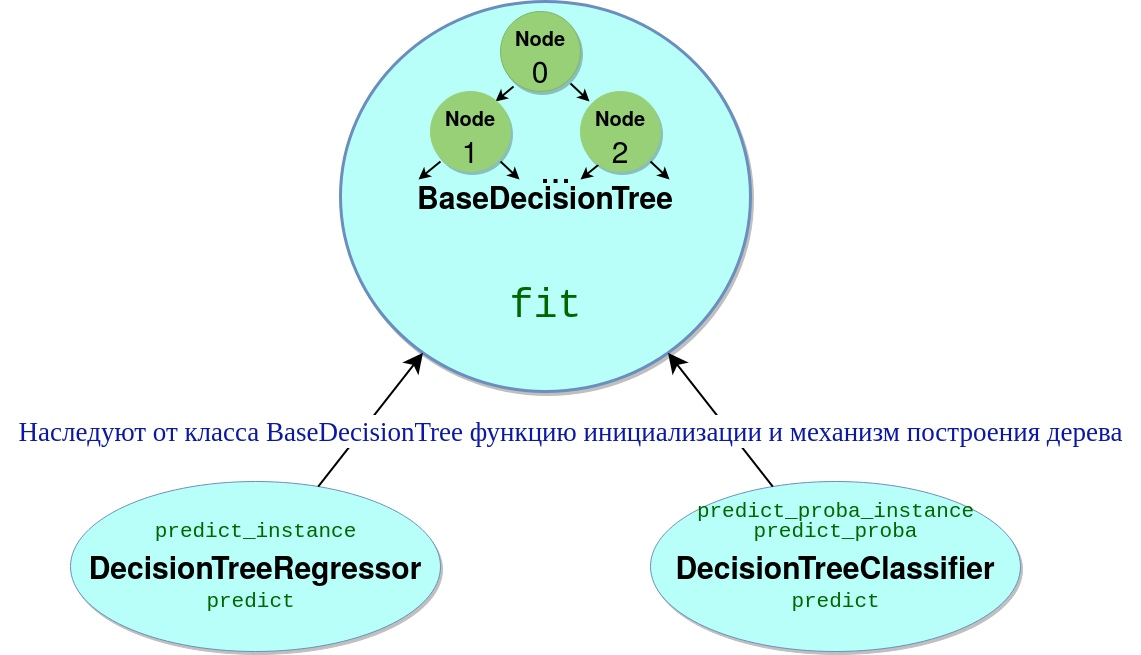

In [31]:
def get_not_nans(arr):
    '''
    Функция, которая создаёт и возвращает новый массив 
    из всех элементов переданного массива, не являющихся None.
    '''
    
    return arr.copy()[~np.isnan(arr)]


class Node(object):
    def __init__(self, split_feature=None, split_threshold=None):
        '''
        Функция инициализации вершины решающего дерева.
        
        Параметры.
        1) split_feature — номер разделяющего признака
        2) split_threshold — пороговое значение
        '''
        
        self.split_feature = split_feature
        self.split_threshold = split_threshold

        # По умолчанию считаем, что у вершины нет дочерних вершин.
        self.left_son, self.right_son = None, None

        # Вероятности попадания в каждую из дочерних вершин нужно поддерживать 
        # для корректной обработки данных с пропусками
        self.left_prob, self.right_prob = 0, 0

        # Массив значений y. Определён только для листовых вершин дерева
        self.y_values = None
        

class BaseDecisionTree(BaseEstimator):
    '''
    Здесь содержится реализация всех основных функций для работы
    с решающим деревом.
    
    Наследование от класса BaseEstimator нужно для того, чтобы 
    в дальнейшем данный   класс можно было использовать в 
    различных функциях библиотеки sklearn, например, в функциях 
    для кросс-валидации.
    '''
    
    def __init__(self, criterion, max_depth=np.inf, min_samples_split=2):
        '''
        Функция инициализации решающего дерева.
        
        Параметры.
        1) criterion — критерий информативности, 
        2) max_depth — максимальная глубина дерева,
        3) min_samples_split — минимальное количество элементов 
        обучающей выборки,  которое должно попасть в вершину, 
        чтобы потом происходило разбиение этой вершины.
        '''
        
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        # Список всех вершин дерева. В самом начале 
        # работы алгоритма есть только одна 
        # вершина — корень.
        self.nodes = [Node()]

        # Количество классов. Актуально только 
        # при решении задачи классификации.
        self.class_count = 1

        # Сюда нужно будет записать все значения 
        # для каждого из признаков датасета
        # (они будут нашими порогами).
        self.feature_values = None
    
    def build_(self, v, X, y, depth=0):
        '''
        Рекурсивная функция построения решающего дерева.
        
        Параметры.
        1) v — номер рассматриваемой вершины
        2) X, y — обучающая выборка, попавшая в текущую вершину
        3) depth — глубина вершины с номером v
        '''
        
        if depth == self.max_depth or len(y) < self.min_samples_split:
            # Еcли строим дерево для классификации, то 
            # сохраняем метки классов всех элементов выборки,
            # попавших в вершину.
            if callable(getattr(self, 'set_class_count', None)):
                self.nodes[v].y_values = y.copy()

            # Для регрессии сразу вычислим среднее всех 
            # элементов вершины.
            else:
                self.nodes[v].y_values = np.mean(y)
            return
        
        best_criterion_value = np.inf
        best_feature, best_threshold = 0, 0
        sample_size, feature_count = X.shape
        
        # переберём все возможные признаки и значения порогов,
        # найдём оптимальный признак и значение порога 
        # и запишем их в best_feature, best_threshold
        
        for feature_id in range(feature_count):
            unique_values = np.unique(self.feature_values[feature_id])

            for threshold in unique_values:
                left = X[:, feature_id] < threshold
                right = ~left
                left_size = np.sum(left)
                right_size = np.sum(right)
                
                if self.criterion == 'entropy':
                    H = entropy_criterion(y[left]) * left_size 
                    H += entropy_criterion(y[right]) * right_size
                elif self.criterion == 'gini':
                    H = gini_criterion(y[left]) * left_size 
                    H += gini_criterion(y[right]) * right_size
                elif self.criterion == 'mean_square':
                    H = mean_square_criterion(y[left]) * left_size 
                    H += mean_square_criterion(y[right]) * right_size
                elif self.criterion == 'mean_abs':
                    H = mean_abs_criterion(y[left]) * left_size 
                    H += mean_abs_criterion(y[right]) * right_size

                if H < best_criterion_value:
                    best_criterion_value = H
                    best_feature = feature_id
                    best_threshold = threshold
            
        # сохраним найденные параметры в класс текущей вершины
        self.nodes[v].split_feature = best_feature
        self.nodes[v].split_threshold = best_threshold
        # разделим выборку на 2 части по порогу
        left = X[:, best_feature] < best_threshold
        right = ~left

        X_l, y_l = X[left], y[left]
        X_r, y_r = X[right], y[right]
        
        # создаём левую и правую дочерние вершины,
        # и кладём их в массив self.nodes 
        self.nodes.append(Node())
        self.nodes.append(Node())
        
        # сохраняем индексы созданных вершин в качестве 
        # левого и правого сына вершины v
        self.nodes[v].left_son, self.nodes[v].right_son =\
            len(self.nodes)-2, len(self.nodes)-1

        # рекурсивно строим дерево для дочерних вершин
        self.build_(self.nodes[v].left_son, X_l, y_l, depth+1)
        self.build_(self.nodes[v].right_son, X_r, y_r, depth+1)
    
    def fit(self, X, y):
        '''
        Функция, из которой запускается построение 
        решающего дерева по обучающей выборке.
        
        Параметры.
        X, y — обучающая выборка
        '''
        
        # сохраним заранее все пороги для каждого из 
        # признаков обучающей выборки
        X, y = np.array(X), np.array(y)
        self.feature_values = []
        for feature_id in range(X.shape[1]):
            self.feature_values.append(
                np.unique(get_not_nans(X[:, feature_id]))
            )
            
        set_class_count = getattr(self, 'set_class_count', None)

        # если строится дерево для классификации, 
        # то нужно посчитать количество классов 
        if callable(set_class_count):
            set_class_count(y)
        self.build_(0, X, y)

Теперь, когда общий код решающего дерева написан, нужно сделать обёртки над `BaseDecisionTree` — классы `DecisionTreeRegressor` и `DecisionTreeClassifier` для использования решающего дерева в задачах регрессии и классификации соответственно.

Допишите функции `predict_instance` и `predict_proba_instance` в классах для регрессии и классификации соответственно. В этих функциях нужно для одного элемента $x$ выборки промоделировать спуск в решающем дереве, а затем по листовой вершине, в которой окажется объект, посчитать для классификации — распределение вероятностей, а для регрессии — число $y$.

In [32]:
class DecisionTreeRegressor(BaseDecisionTree):
    def predict_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая значение
        y для одного элемента x из выборки.
        
        Параметры.
        1) x — элемент выборки, для которого
        требуется предсказать значение y
        2) v — рассматриваемая вершина дерева
        '''
        
        # если вершина — лист, возвращаем в качестве предсказания 
        # среднее всех элементов, содержащихся в ней
        if self.nodes[v].left_son is None:
            return self.nodes[v].y_values
            
        # если у объекта x значение признака по
        # которому происходит разделение,  меньше 
        # порогового, то спускаемся в левое поддерево,
        # иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].right_son)
            
        # а если у элемента отсутствует значение 
        # разделяющего признака,  то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_instance(x, self.nodes[v].right_son)
            return self.nodes[v].left_prob * left_predict +\
            self.nodes[v].right_prob * right_predict
    
    def predict(self, X):
        '''
        Функция, предсказывающая значение
        y для всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется
        получить вектор предсказаний y
        '''
        
        return [self.predict_instance(x, 0) for x in X]

Для удобства реализации функции `predict_proba_instance` класса `DecisionTreeClassifier` будем считать, что все классы имеют целочисленные метки от 0 до $k-1$, где $k$ — количество классов. Если бы это условие не было выполнено, то нужно было бы сначала сделать предобработку меток классов в датасете.

In [33]:
class DecisionTreeClassifier(BaseDecisionTree):
    def set_class_count(self, y):
        '''
        Функция, вычисляющая количество классов 
        в обучающей выборке.
        
        Параметры.
        y — значения класса в обучающей выборке
        '''
        
        self.class_count = np.max(y) + 1
    
    def predict_proba_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая вектор
        вероятностей принадлежности  объекта x
        к классам
        
        Параметры.
        1) x — элемент выборки, для которого 
        требуется предсказать значение y
        2) v — вершина дерева, в которой 
        находится алгоритм
        '''
        
        if self.nodes[v].left_son is None:
            # считаем долю каждого класса и возвращаем вектор вероятностей 
            probs = np.zeros(self.class_count)
            classes, counts = np.unique(self.nodes[v].y_values,
                                                     return_counts=True)
            total_count = np.sum(counts)
            probs[classes] = counts / total_count
            
            return probs
            
        # если у объекта x значение признака по которому
        # происходит разделение, меньше порогового, 
        # то спускаемся в левое поддерево, иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].right_son)
            
        # а если у объекта отсутствует значение 
        # разделяющего признака, то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_proba_instance(
                x, self.nodes[v].left_son)
            right_predict = self.predict_proba_instance(
                x, self.nodes[v].right_son)
            return (self.nodes[v].left_prob * left_predict +
                    self.nodes[v].right_prob * right_predict)
    
    def predict_proba(self, X):
        '''
        Функция, предсказывающая вектор вероятностей
        принадлежности объекта x к классам для 
        каждого x из X
        
        Параметры.
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        
        return [self.predict_proba_instance(x, 0) for x in X]
    
    def predict(self, X):
        '''
        Функция, предсказывающая метку класса для
        всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется получить
        вектор предсказаний y
        '''
        
        return np.argmax(self.predict_proba(X), axis=1)

**Подбор параметров.**

В этой части задания вам предлагается поработать с написанным решающим деревом, применив его к задачи классификации и регрессии, и в обеих задачах подобрать оптимальные параметры для построения.

Не забывайте писать выводы.

**1. Задача регрессии.**

Теперь самое время протестировать работу написанного нами решающего дерева. В качестве датасете возьмите `boston` из `sklearn`. 

In [34]:
#boston_X, boston_y = load_boston(return_X_y=True)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_y = raw_df.values[1::2, 2]

Далее для критерия `r2_score` найдите оптимальные параметры обучения дерева — `max_depth` и `min_samples_split`. Рассмотрите диапозон значений для `max_depth`: от 3 до 14.

Еще пару импортов

In [35]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

Перечислим параметры для сетки

In [36]:
regression_criteria = r2_score
criterion_names = 'r2_score'
criterion_range = ['entropy', 'gini', 'mean_square', 'mean_abs']
max_depth_range = np.arange(3, 15)
min_samples_split_range = [3, 5, 8]


С начала надо разбить выборку на train и test.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, random_state=42)

Теперь проведите кросс-валидацию для каждого из критериев разбиения вершин.

In [38]:
results = {}
results_plot = {}

for criterion in criterion_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            if min_samples_split == 5:
                model = DecisionTreeRegressor(criterion=criterion,
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split)
                model.fit(X_train, y_train)
                y_pred_test = model.predict(X_test)
                y_pred_train = model.predict(X_train)
                train_score = r2_score(y_train, y_pred_train)
                test_score = r2_score(y_test, y_pred_test)
                
                results_plot[(criterion, max_depth, 'train')] = train_score
                results_plot[(criterion, max_depth, 'test')] = test_score
            
            print(criterion, max_depth, min_samples_split)
            model = DecisionTreeRegressor(criterion=criterion,
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split)
            
            kf = KFold(n_splits=3, shuffle=True, random_state=42)
            scores = cross_val_score(model, X_train,
                                     y_train, cv=kf,
                                     scoring='r2')
            
            results[(criterion, max_depth, min_samples_split)] = np.mean(scores)


entropy 3 3
entropy 3 5
entropy 3 8
entropy 4 3
entropy 4 5
entropy 4 8
entropy 5 3
entropy 5 5
entropy 5 8
entropy 6 3
entropy 6 5
entropy 6 8
entropy 7 3
entropy 7 5
entropy 7 8
entropy 8 3
entropy 8 5
entropy 8 8
entropy 9 3
entropy 9 5
entropy 9 8
entropy 10 3
entropy 10 5
entropy 10 8
entropy 11 3
entropy 11 5
entropy 11 8
entropy 12 3
entropy 12 5
entropy 12 8
entropy 13 3
entropy 13 5
entropy 13 8
entropy 14 3
entropy 14 5
entropy 14 8
gini 3 3
gini 3 5
gini 3 8
gini 4 3
gini 4 5
gini 4 8
gini 5 3
gini 5 5
gini 5 8
gini 6 3
gini 6 5
gini 6 8
gini 7 3
gini 7 5
gini 7 8
gini 8 3
gini 8 5
gini 8 8
gini 9 3
gini 9 5
gini 9 8
gini 10 3
gini 10 5
gini 10 8
gini 11 3
gini 11 5
gini 11 8
gini 12 3
gini 12 5
gini 12 8
gini 13 3
gini 13 5
gini 13 8
gini 14 3
gini 14 5
gini 14 8
mean_square 3 3
mean_square 3 5
mean_square 3 8
mean_square 4 3
mean_square 4 5
mean_square 4 8
mean_square 5 3
mean_square 5 5
mean_square 5 8
mean_square 6 3
mean_square 6 5
mean_square 6 8
mean_square 7 3
mean_s

Лучшее значение:
max_depth = 4, min_samples_split = 3, criterion = mean_square

In [55]:
best_params = max(results, key=results.get)
best_score = results[best_params]

print(f'Лучшие параметры: {best_params}')
print(f'Максимальный R2-score: {best_score}')

Лучшие параметры: ('mean_square', 4, 3)
Максимальный R2-score: 0.7158024448688202


Постройте графики зависимости `r2-score` от максимальной глубины дерева на обучающей и тестовой выборке для каждого критерия на train и на test. В качестве максимальной глубины используйте значения от 1 до 14. Значение `min_samples_split` фиксируйте.

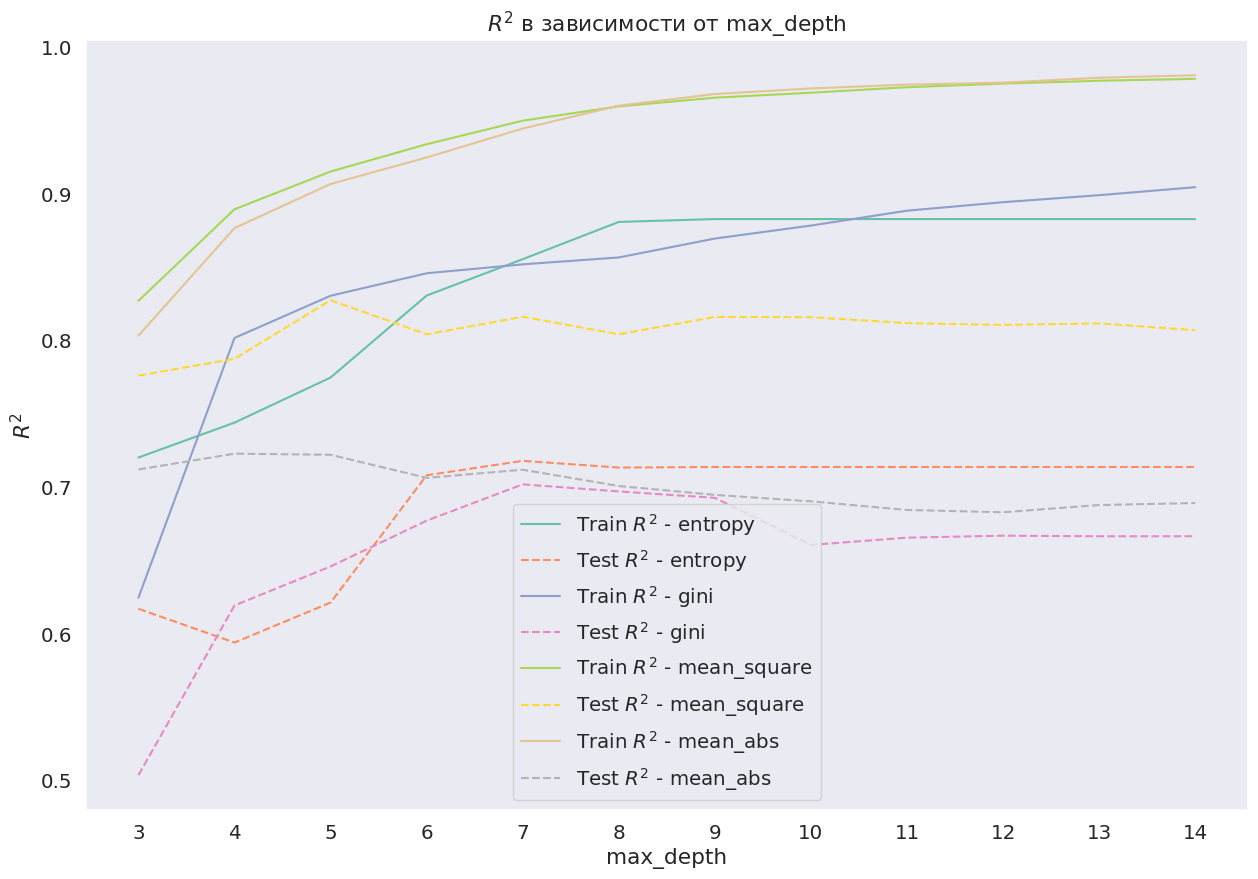

In [50]:
plt.figure(figsize=(15, 10))

for criterion in criterion_range:
    train_scores = [results_plot.get((criterion, max_depth, 'train'), np.nan) for max_depth in max_depth_range]
    test_scores = [results_plot.get((criterion, max_depth, 'test'), np.nan) for max_depth in max_depth_range]
    plt.plot(max_depth_range, train_scores, label=f'Train $R^2$ - {criterion}')
    plt.plot(max_depth_range, test_scores, label=f'Test $R^2$ - {criterion}', linestyle='--')

plt.title(r'$R^2$ в зависимости от max_depth')
plt.xlabel('max_depth')
plt.ylabel(r'$R^2$')
plt.xticks(max_depth_range)
#plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.show()


Сделайте вывод, в котором объясните, почему графики получились такими.

Скорее всего, вы заметили, что дерево в этих экспериментах строится довольно медленно. Как можно ускорить его построение? Можно ли ускорить нахождение оптимального разбиения по некоторому вещественному признаку?

**Вывод.**

Слишком глубокое дерево - плохо - начинается переобучение (начиная с глубины 6) и создание лишних поддеревьев - поэтому начиная с некоторого значения качество не улучшается на тестовой выборке, но улучшается только на тренировочной (при достаточно большом дереве можно сделать уникальные листья для каждого элемента выборки)

Для нашей задачи лучше подходят метрики mean_square, mean_abs, а entropy, gini - хуже

Ускорение: основная нагрузка в полном переборе вещественных признаков по всем уникальным значениям. Ввиду того, что эти признаки вещественные, то и почти все значения уникальные. Можно, например, брать их с какой то точностью (например в отрезке длины 1 брать только одно значение), брать какие-то квантили, брать долю случайных

**2. Задача классификации, работа с пропусками**

В этом пункте вам предстоит освоиться с обработкой пропусков в решающих деревьях, реализованной ранее.

Рассмотрим датасет, в котором часть данных пропущена. В качестве примера возьмём датасет https://archive.ics.uci.edu/ml/datasets/Adult для определения категории дохода работников, по таким признакам, как возраст, образование, специальность, класс работы, пол, кол-во отрабатываемых часов в неделю и некоторым другим.

In [40]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education1', 'education2', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country', 'target'
]

Поскольку предсказание в дереве на данных с пропусками часто занимает сильно больше времени, чем в случае отсутствия пропусков (так как часто приходится спускаться разу в 2 поддерева), то для экономии времени сократим датасет, взяв из него только первые 10000 строк данных.

In [41]:
adult_df = pd.read_csv('adult.data', header=None)[:1000]
adult_df.columns = column_names
target = adult_df['target'] == ' >50K'
adult_df = adult_df.drop(['target'], axis=1)
adult_df.head()

,age,workclass,fnlwgt,education1,education2,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Предобработаем датасет, заменив категориальные признаки one-hot векторами.

In [42]:
adult_df = pd.get_dummies(adult_df)
adult_df.head()

,age,fnlwgt,education2,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Laos,native-country_ Mexico,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ United-States
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Поскольку все пропущенные значения относились к категориальным признакам и помечались в датасете знаком `?`, то для каждого категориального признака `feature` исходного датасета надо выполнить следующую процедуру: рассмотреть признак `feature_?` нового датасета и для всех строк, для которых выполнено `feature_?=1`, значениях всех признаков с префиксом `feature` установить в `None`. 

In [43]:
all_indices = np.arange(adult_df.shape[0])

for feature in column_names:
    if f'{feature}_ ?' in adult_df.columns:
        none_indices = all_indices[adult_df[f'{feature}_ ?'] == 1]
        
        for dummy_feature in adult_df.columns:
            if not dummy_feature.startswith(f'{feature}_ '):
                continue
            if dummy_feature != f'{feature}_ ?':
                adult_df[dummy_feature][none_indices] = None
        adult_df = adult_df.drop(f'{feature}_ ?', axis=1)

Посмотрим на распределение пропущенных значений по признакам.

In [44]:
np.sum(adult_df.isnull(), axis=0)

age                               0
fnlwgt                            0
education2                        0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_ Puerto-Rico      18
native-country_ South            18
native-country_ Taiwan           18
native-country_ Thailand         18
native-country_ United-States    18
Length: 90, dtype: int64

Разобьём данные на обучающую и тестовую выборки в отношении 3:1.

In [45]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(
    adult_df, target, random_state=700
)
X_adult_train = X_adult_train.replace({True: 1, False: 0}).to_numpy() 
y_adult_train = y_adult_train.replace({True: 1, False: 0}).to_numpy() 

X_adult_test = X_adult_test.replace({True: 1, False: 0}).to_numpy() 
y_adult_test = y_adult_test.replace({True: 1, False: 0}).to_numpy()

При помощи кросс-валидации найдём оптимальные гиперпараметры `max_depth` и `min_samples_split` для каждого из критериев разбиения деревьев для классификации.

In [46]:
results_new = {}
results_plot_new = {}

for criterion in criterion_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            print(criterion, max_depth, min_samples_split)
            if min_samples_split == 5:
                model = DecisionTreeClassifier(criterion=criterion,
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split)
                model.fit(X_adult_train, y_adult_train)
                y_pred_test = model.predict(X_adult_test)
                y_pred_train = model.predict(X_adult_train)
                train_score = accuracy_score(y_adult_train, y_pred_train)
                test_score = accuracy_score(y_adult_test, y_pred_test)
                
                results_plot_new[(criterion, max_depth, 'train')] = train_score
                results_plot_new[(criterion, max_depth, 'test')] = test_score
            
            model = DecisionTreeClassifier(criterion=criterion,
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split)
            
            kf = KFold(n_splits=3, shuffle=True, random_state=42)
            scores = cross_val_score(model, X_adult_train,
                                     y_adult_train, cv=kf,
                                     scoring='accuracy')
            
            results_new[(criterion, max_depth, min_samples_split)] = np.mean(scores)


entropy 3 3
entropy 3 5
entropy 3 8
entropy 4 3
entropy 4 5
entropy 4 8
entropy 5 3
entropy 5 5
entropy 5 8
entropy 6 3
entropy 6 5
entropy 6 8
entropy 7 3
entropy 7 5
entropy 7 8
entropy 8 3
entropy 8 5
entropy 8 8
entropy 9 3
entropy 9 5
entropy 9 8
entropy 10 3
entropy 10 5
entropy 10 8
entropy 11 3
entropy 11 5
entropy 11 8
entropy 12 3
entropy 12 5
entropy 12 8
entropy 13 3
entropy 13 5
entropy 13 8
entropy 14 3
entropy 14 5
entropy 14 8
gini 3 3
gini 3 5
gini 3 8
gini 4 3
gini 4 5
gini 4 8
gini 5 3
gini 5 5
gini 5 8
gini 6 3
gini 6 5
gini 6 8
gini 7 3
gini 7 5
gini 7 8
gini 8 3
gini 8 5
gini 8 8
gini 9 3
gini 9 5
gini 9 8
gini 10 3
gini 10 5
gini 10 8
gini 11 3
gini 11 5
gini 11 8
gini 12 3
gini 12 5
gini 12 8
gini 13 3
gini 13 5
gini 13 8
gini 14 3
gini 14 5
gini 14 8
mean_square 3 3
mean_square 3 5
mean_square 3 8
mean_square 4 3
mean_square 4 5
mean_square 4 8
mean_square 5 3
mean_square 5 5
mean_square 5 8
mean_square 6 3
mean_square 6 5
mean_square 6 8
mean_square 7 3
mean_s

Лучшая модель все та же

('mean_square', max_depth=4, min_samples_split=3)

In [58]:
best_params = max(results_new, key=results.get)
best_score = results_new[best_params]

print(f'Лучшие параметры: {best_params}')
print(f'Максимальный R2-score: {best_score}')

Лучшие параметры: ('mean_square', 4, 3)
Максимальный R2-score: 0.8373333333333334


Постройте графики зависимости `accuracy` от максимальной глубины дерева на обучающей и тестовой выборке, аналогично тому как сделали в пунтке с регресиией для `r2-score`.

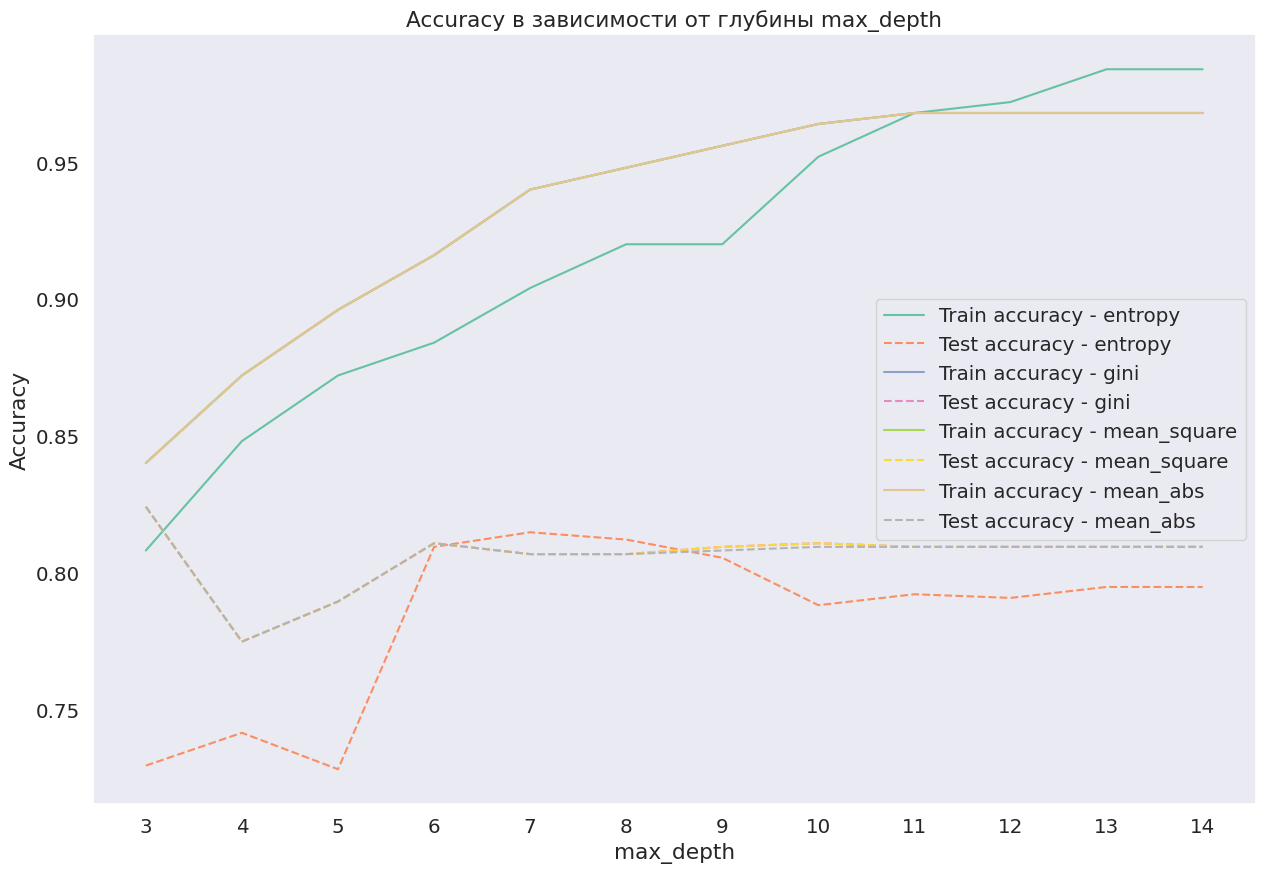

In [77]:
plt.figure(figsize=(15, 10))
дерева
for criterion in ['entropy', 'gini', 'mean_square', 'mean_abs']:
    train_scores = [results_plot_new.get((criterion, max_depth, 'train'),
                                         np.nan) for max_depth in max_depth_range]
    test_scores = [results_plot_new.get((criterion, max_depth, 'test'),
                                        np.nan) for max_depth in max_depth_range]
    plt.plot(max_depth_range, train_scores, label=f'Train accuracy - {criterion}')
    plt.plot(max_depth_range, test_scores, label=f'Test accuracy - {criterion}', linestyle='--')

plt.title('Accuracy в зависимости от глубины max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range)
#plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.show()


Сделайте выводы. Почему графики получились такими? Как соотносятся оптимальные значения параметров на обучающей и на тестовой выборках?

**Вывод.**

Аналогично прошлым графикам, видна проблема переобучения дерева.

Часть графиков накладывается друг на друга (все кроме entropy) - деревья бьются одинаково по любому из оставшихся критериев 

**Выводы по ML3**

**Про сравнение логрегрессии и дерева**

Логрегрессия работает хорошо, если есть линейное разделение данных.

Дерево в свою очередь может работать и с нелинейными данными, а еще лучше себя покажет в случаях с категориальными признаками или наличиями пропусков в данных.

**Про валидацию**

Следует использовать чуть более сложные методы валидации, чем простое разбиение на валидационную и тренировочную выборку, они могут дать сильный выигрыш